In [22]:
import numpy as np
import torch
import torchvision
from torchvision import models,transforms
from PIL import Image
import matplotlib.pyplot as plt
import json

In [23]:
# !pip install pillow
# !pip install matplotlib

In [24]:
!pip show torchvision

Name: torchvision
Version: 0.7.0
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: /home/duyloc/anaconda3/envs/py36/lib/python3.6/site-packages
Requires: numpy, torch, pillow
Required-by: 


In [25]:
use_pretrained = True
net = models.vgg16(pretrained = use_pretrained)
net.eval()
print(net)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [26]:
class BaseTransform() :
    def __init__(self,resize, mean, std) :
        self.base_transform = transforms.Compose([
            transforms.Resize(resize),
            transforms.CenterCrop(resize),
            transforms.ToTensor(),
            transforms.Normalize(mean,std)])
    def __call__(self,img) :
        return self.base_transform(img)

In [27]:
!ls

data			   model-nn-sequential.ipynb  torch.Tensor.ipynb
imagenet_class_index.json  models-nnModule.ipynb
Load_VGG.ipynb		   pytorch_beginner.ipynb


In [28]:
# !mkdir data
# !mv a.jpg data

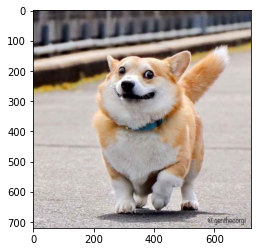

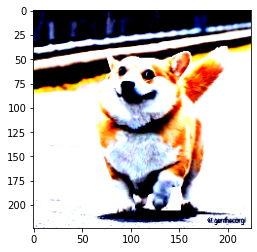

In [35]:
image_file_path = "./data/b.jpg"
img = Image.open(image_file_path)
plt.imshow(img)
plt.show()
resize = 224
mean = (0.485, 0.456, 0.406) 
std = (0.229, 0.224, 0.225)
transform = BaseTransform(resize,mean,std) # Tao ra transform
img_transformed = transform(img) # Transform anh input

# (channels,height,width) => (height,width,channels)
# clip (0,1)
img_transformed = img_transformed.numpy().transpose(1,2,0)
img_transformed = np.clip(img_transformed,0,1)

plt.imshow(img_transformed)
plt.show()

In [36]:
class Predictor() :
    def __init__(self,class_index) :
        self.class_index = class_index
    def predict_max(self, out) : # out dang o dang tensor
        # dung detach() tach out ra khoi network va.numpy() chuyen ve dang numpy
        maxid = np.argmax(out.detach().numpy())
        predict_label_name = self.class_index[str(maxid)]
        return predict_label_name

In [37]:
!ls

data			   model-nn-sequential.ipynb  torch.Tensor.ipynb
imagenet_class_index.json  models-nnModule.ipynb
Load_VGG.ipynb		   pytorch_beginner.ipynb


In [38]:
class_index = json.load(open('./imagenet_class_index.json','r'))

In [39]:
predictor = Predictor(class_index)

In [41]:
img_file_path = './data/b.jpg'
img = Image.open(img_file_path)
resize = 224
mean = (0.485, 0.456, 0.406) 
std = (0.229, 0.224, 0.225)
transform = BaseTransform(resize,mean,std)
img_transformed = transform(img)
img_transformed.shape
# Them mot chieu vao img
img_transformed = img_transformed.unsqueeze_(0)
img_transformed.shape
# img_transformed = img_transformed.numpy().transpose(1,2,0)
# img_transformed = np.clip(img_transformed,0,1)
out = net(img_transformed)
result = predictor.predict_max(out)
print(result)


['n02113023', 'Pembroke']
